In [1]:
# Rename file "overload_calc_min_v02b.ipybn" 
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt
from utils.values_tools import *
from utils.add_tools import *
from utils.variables import container_sections

%matplotlib inline

In [2]:
# ================== Y1-data ==================
data_Y1 = pd.ExcelFile("distributions_data.xlsx").parse("Y1")
X1 = data_Y1["X"].to_numpy()
pos_Y1 = data_Y1["pos_Y1"].to_numpy()
pos_Y1 = interp1d(X1, pos_Y1, fill_value="extrapolate")
neg_Y1 = data_Y1["neg_Y1"].to_numpy()
neg_Y1 = interp1d(X1, neg_Y1, fill_value="extrapolate")


# ================== Y2-data ==================
data_Y2 = pd.ExcelFile("distributions_data.xlsx").parse("Y2")
val_pos_Y2 = data_Y2["pos_Y2"][0] #.to_numpy()
val_neg_Y2 = data_Y2["neg_Y2"][0] #.to_numpy()
pos_Y2 = lambda x: val_pos_Y2 if isinstance(x, float) or isinstance(x, int) else len(x)*[val_pos_Y2]
neg_Y2 = lambda x: val_neg_Y2 if isinstance(x, float) or isinstance(x, int) else len(x)*[val_neg_Y2]


# ================== Y3-data ==================
data_Y3 = pd.ExcelFile("distributions_data.xlsx").parse("Y3")
X3 = data_Y3["X"].to_numpy()
neg_Y3 = data_Y3["neg_Y3"].to_numpy()
neg_Y3 = interp1d(X3, neg_Y3, fill_value="extrapolate")


# ================ Sections data ===================
sections = pd.ExcelFile("sections_data.xlsx").parse('sections').to_numpy()
parameters = {}

# ================ Save to Excel ================
# writer = pd.ExcelWriter('out_values.xlsx', engine='xlsxwriter')
# df.to_excel(writer, 'ny')
# writer.save()

In [3]:
# ===================== Save all figs =====================        
# multipleSaveFigs(**figs)

In [4]:
print(only_section(neg_Y3, sections, ["55", "56"]))
print(only_section(neg_Y1, sections, ["55", "56"]))
print(only_section(pos_Y1, sections, ["55", "56"]))

[['55', '56'], [-53.644859813083634, -43.130841121494825]]
[['55', '56'], [-59.71588785046672, -47.17967289719566]]
[['55', '56'], [41.8011214953267, 33.02577102803696]]


In [5]:
section55 = model(
    functions = {"pos_Y1": pos_Y1, 
                 "neg_Y1": neg_Y1, 
                 "neg_Y3": neg_Y3},
    name=["55"], sections=sections)

section56 = model(
    functions = {"pos_Y1": pos_Y1, 
                 "neg_Y1": neg_Y1, 
                 "neg_Y3": neg_Y3},
    name=["56"], sections=sections)

print(section55, section56, sep="\n")

('neg_Y1', 59.71588785046672, 14.252336448598141, <scipy.interpolate.interpolate.interp1d object at 0x000001543F14CEA0>)
('neg_Y1', 47.17967289719566, 14.485981308411226, <scipy.interpolate.interpolate.interp1d object at 0x000001543F14CEA0>)


case:  neg_turb
max_val =  59.71588785046672
X_max =  14.252336448598141 [mm]


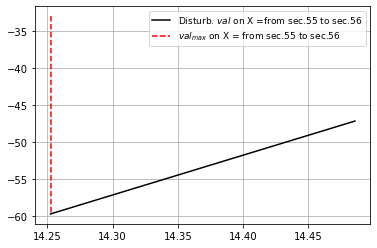

In [6]:
# ===================== 55-56 sections =====================
names = ["55", "56"]

case_55_56, max_val_55_56, X_max_55_56, ax_55_56, fig_55_56, \
case_min_55_56, min_val_55_56, X_min_55_56 = model(
    functions = {"pos_turb": pos_Y1, 
                 "neg_turb": neg_Y1, 
                 "neg_down": neg_Y3},
    name=names, sections=sections) # L = L

print("case: ", case_55_56)
print("max_val = ", max_val_55_56)
print("X_max = ", X_max_55_56, "[mm]")
fig_55_56

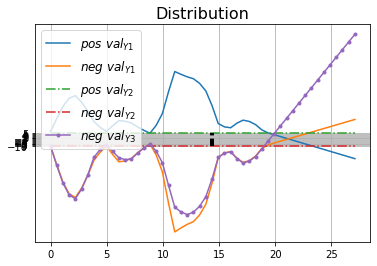

In [7]:
# %matplotlib notebook
def view_sections_plot(X, save=False, **functions):
    """
    Give figure on all length.
    
    Parameters:
    ----------
    X         -- Float. For example: length from nose to end airplane. 
    save      -- switcher. Choose save or not the figure.
    functions -- dict with function objects.

    Returns:
    -------
    fig -- figure of all overloads.
    """
    pos_Y1 = functions["pos_Y1"]
    neg_Y1 = functions["neg_Y1"]
    pY2 = lambda x: pos_Y2(x) if type(x) == int or type(x) == float else len(x)*[pos_Y2(x)]
    nY2 = lambda x: neg_Y2(x) if type(x) == int or type(x) == float else len(x)*[neg_Y2(x)]
    neg_Y3 = functions["neg_Y3"]
    
    xline1 = [NameToX("55", sections)]*10
    xline2 = [NameToX("56", sections)]*10
    yline = lambda x: np.linspace(-10, 5, len(x))
    
    
    X = np.linspace(0, X)
    plt.plot(X, pos_Y1(X))
    plt.plot(X, neg_Y1(X))
    plt.plot(X, pos_Y2(X), '-.')
    plt.plot(X, neg_Y2(X), '-.')
    plt.plot(X, neg_Y3(X), '.-')
    plt.plot(xline1, yline(xline1), "--k", linewidth=2)
    plt.plot(xline2, yline(xline2), "--k", linewidth=2)
    
    plt.yticks(np.arange(-10., 6., 1))
    plt.grid(which="both")
    plt.legend(["$pos$ $val_{Y1}$", "$neg$ $val_{Y1}$", 
                "$pos$ $val_{Y2}$", "$neg$ $val_{Y2}$",
                "$neg$ $val_{Y3}$"], 
               fontsize=12#, bbox_to_anchor=(1.05, 1)
              )
    
    plt.title("Distribution", 
              fontdict = {"fontsize": 16})
    fig = plt.gcf()
    plt.close()
    if save:
        fig.savefig("images/Val_dist_55_56.png", dpi=250, bbox_inches="tight")
    return fig


max_len = sections[-1, 1]
view_sections_plot(max_len,
                pos_Y1 = pos_Y1, 
                neg_Y1 = neg_Y1,
                neg_Y3 = neg_Y3, save=False)

In [8]:
p_Y1 = only_section(pos_Y1, sections, ["55", "56"])
n_Y1 = only_section(neg_Y1, sections, ["55", "56"])
n_Y3 = only_section(neg_Y3, sections, ["55", "56"])
p_Y1, n_Y1, n_Y3

([['55', '56'], [41.8011214953267, 33.02577102803696]],
 [['55', '56'], [-59.71588785046672, -47.17967289719566]],
 [['55', '56'], [-53.644859813083634, -43.130841121494825]])